# DBSCAN

Density-Based Spatial Clustering of Applications with Noice

- Group Closely placed points
- Make space points as noice

1. Epsilon (E): Max Distance between points
2. Min Points: Min Points from cluster
3. Core Points: Having at least Min Points
4. Border Points: Within E-neighbors but out of min points
5. Noise Points: Not in E-neighbors or in core points

**Steps**

1. Identify Core Points
2. Form Clusters
3. Expand Clusters
4. Mark Noice

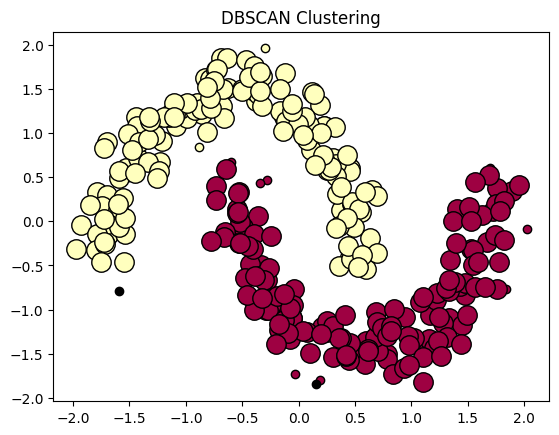

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Generate sample data
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
X = StandardScaler().fit_transform(X)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=5).fit(X)
labels = db.labels_

# Identify core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Plot the results
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

plt.title('DBSCAN Clustering')
plt.show()
